# Packages

In [1]:
import matplotlib as mpl
import pandas as pd               # the main HDF5 reader
import numpy as np                # must have
import seaborn as sns              # beautiful statistical plots!
import sys, itertools, collections #, aa
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 6
import glob
from matplotlib import pyplot
import pylab as P

from matplotlib import pyplot
import csv, math

import matplotlib as plt
get_ipython().magic(u'pylab inline')
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10
import numpy as np
import pylab as P
from numpy import sin, cos, pi, linspace
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

from matplotlib.pyplot import plot, legend, show, grid, figure, savefig
pylab.rcParams['figure.figsize'] = 14, 10

import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# File processing

In [2]:
dataF1 = pd.read_csv("C:/Users/user/Desktop/Projet personnel en physique/DataNoiseEngine165.txt", sep = " ")
dataF1 = dataF1.dropna(axis="columns", how="any")
dataF1 = dataF1.head(30)
nan_in_dataF1 = dataF1.isnull().sum().sum()
print(dataF1.shape, "NaN in dataF1 :", nan_in_dataF1)

(30, 6051) NaN in dataF1 : 0


In [3]:
#Tout les titres de colonne dans une liste
col_names_old = []
for colonne in dataF1.columns:
    col_names_old.append(colonne)
print(len(col_names_old))

6051


In [4]:
#J'enlève le titre de la 1ère colonne, à savoir 'Energy', et je conserve tout les NoiseEngine_...
col_names = col_names_old[1:]
print(len(col_names))

6050


In [5]:
Event_nbr = 250 #Nombre d'évènements/lignes à sélectionner dans les fichiers de neutrinos

In [6]:
#Tau
dataF165 = pd.read_csv("C:/Users/user/Desktop/Projet personnel en physique/165.txt", sep = " ")
dataF165 = dataF165.dropna(axis="columns", how="any")
dataF165 = dataF165.head(Event_nbr)

In [7]:
#électronique 1
dataF121 = pd.read_csv("C:/Users/user/Desktop/Projet personnel en physique/121.txt", sep = " ")
dataF121 = dataF121.dropna(axis="columns", how="any")
dataF121 = dataF121.head(Event_nbr)

In [8]:
#muonique
dataF141 = pd.read_csv("C:/Users/user/Desktop/Projet personnel en physique/141.txt", sep = " ")
dataF141 = dataF141.dropna(axis="columns", how="any")
dataF141 = dataF141.head(Event_nbr)

In [9]:
#électronique 2
list125 = []
with open("C:/Users/user/Desktop/Projet personnel en physique/125.txt") as file :
    ligne = file.readlines()
    for i in range(Event_nbr+1):
        list125.append(ligne[i])

In [10]:
list125_str = []
for i in range(Event_nbr+1):                       
    #print(len(list125[i],type(list125[i]))
    list125[i] = list125[i].split(' ')    #On sépare les valeurs
    list125[i] = list125[i][1:]           #On enlève la 1ère valeur : Type
    if i > 0:
        list125[i] = list125[i][:-1]          #On enlève la dernière valeur : '/n'

In [11]:
list125_float = [[float(j) for j in list125[i]]for i in range(1,len(list125))] #On transforme tout les str en float

In [12]:
#(On a donc, 1ère ligne de titre et les suivantes de valeurs en 'float')
li = [list125[0]]
list125_ready = li + list125_float

In [13]:
#On crée un dataframe avec les éléments du fichier 125
dataF125= pd.DataFrame(data= list125_ready[1:], columns = col_names_old)

In [14]:
#Bruit
listNoise = []
with open("C:/Users/user/Desktop/Projet personnel en physique/Noise.txt") as file :
    ligne = file.readlines()
    for i in range(4*Event_nbr+1):      
        listNoise.append(ligne[i])

In [15]:
for i in range(4*Event_nbr+1):
    listNoise[i] = listNoise[i].split(' ')    #On sépare les valeurs
    listNoise[i] = listNoise[i][1:]           #On enlève la 1ère valeur : Type
    if i > 0:
        listNoise[i] = listNoise[i][:-1]      #On enlève la dernière valeur : '/n' uniquement présente dans les lignes 1->N

In [16]:
listNoise_float = [[float(j) for j in listNoise[i]]for i in range(1,len(listNoise))] #On transforme tout les str en float

In [17]:
#On a donc, 1ère ligne de titre et les suivantes de valeurs en 'float'
lis = [listNoise[0]]
listNoise_ready = lis + listNoise_float

In [18]:
#On crée un dataframe avec les éléments du fichier Noise
dataFNoise= pd.DataFrame(data= listNoise_ready[1:], columns = col_names_old)

In [19]:
#On rassemble tout les DataFrames en 1 seul, à ce stade les valeurs d'énergies sont toujours là
dataF_tot = pd.concat([dataF165, dataF125, dataF121, dataF141, dataFNoise], axis=0)

In [20]:
#Je cherche des NaN dans le dataframe
nan_dataF_tot = dataF_tot.isnull().sum().sum()
print("# de NaN :",nan_dataF_tot)

# de NaN : 0


In [21]:
#Je supprime la 1ère colonne, celle des énergies
dataF = dataF_tot.drop('Energy', axis=1)

In [22]:
nd = dataF.to_numpy()   #Données en format numpy array

# PCA and K-Means analysis

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(dataF)

In [24]:
XX = []
YY= [] 
i =0 
while i < len(Y_sklearn):
    XX.append(Y_sklearn[i][0])     #On ajoute tous les éléments de la 1ère colonne à XX
    YY.append(Y_sklearn[i][1])     #                            de la 2ème colonne à YY
    i+=1
print(len(XX), len(YY))

2000 2000


In [25]:
l_redX = []                                          #1ère couleur : neutrino ..5 
l_redY = []                                          #2ème couleur : neutrino ..1 
l_blueX = []                                         #3ème couleur : Bruit       
l_blueY = []                                       
l_greenX = []                                        
l_greenY = []
#-----------------------Représentation du xx5---------------------------
for i in range(2*Event_nbr):   #2*Event_nbr     20               
    l_redX.append(XX[i])
    l_redY.append(YY[i])
#-----------------------Représentation du xx1---------------------------
for i in range(2*Event_nbr,4*Event_nbr):  #2*Event_nbr,4*Event_nbr      20,40 
    l_greenX.append(XX[i])
    l_greenY.append(YY[i])
#----------------------Représentation du bruit--------------------------
for i in range(4*Event_nbr,8*Event_nbr):  #4*Event_nbr,8*Event_nbr     40,79
    l_blueX.append(XX[i])
    l_blueY.append(YY[i])

No handles with labels found to put in legend.


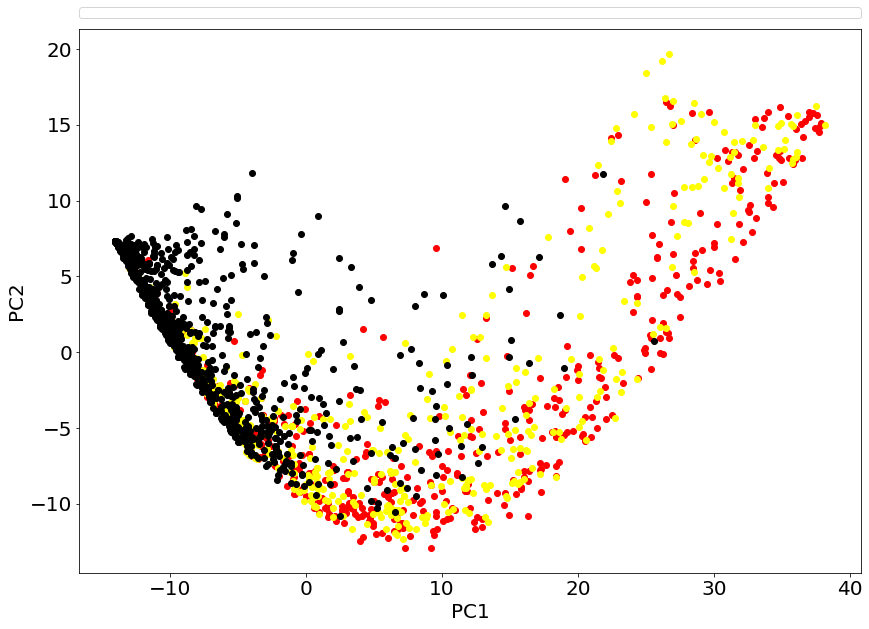

In [26]:
pylab.rcParams['figure.figsize'] = 14, 10
plt.plot(l_redX,l_redY,marker= 'o',linestyle = 'None', color = 'Red')  #xx5
pylab.xlabel(r'PC1', size = 20)
pylab.ylabel(r'PC2', size = 20)
pylab.xticks( size=20)
pylab.yticks(size=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5,fontsize = 14, mode="expand", borderaxespad=0.)

plt.plot(l_greenX,l_greenY,marker= 'o',linestyle = 'None', color = 'Yellow') #xx1

plt.plot(l_blueX,l_blueY,marker= 'o',linestyle = 'None', color = 'Black') #Noise

### Cut & Optimisation 

In [27]:
nbr_neutrinos = len(dataF165) + len(dataF125) + len(dataF121) + len(dataF141) 
nbr_noise = len(dataFNoise)
print("Pureté initiale de l'échantillon :",(nbr_neutrinos/(nbr_neutrinos + nbr_noise))*100, "%")

Pureté initiale de l'échantillon : 50.0 %


In [28]:
#Test de coupure/opti
X1_cut = []
max1_comb = []
for treshold in range(-20,20):
    X1_cut.append(treshold)
    count= 0
    for j in l_redX:
        if j > treshold:
            count += 1
    for j in l_greenX:
        if j > treshold:
            count += 1
    count_black = 0
    for j in l_blueX:
        if j > treshold:
            count_black += 1
    max1_comb.append((count/sqrt(count+count_black),treshold))
    #print(count/sqrt(count+count_black))

maximum =0
index = 0
Y1_cut = []
for a in range(len(max1_comb)):
    Y1_cut.append(max1_comb[a][0])
    current = max1_comb[a][0]
    if current > maximum:
        maximum = current
        index = a
print("La coupure optimale se trouve en Z1 =",max1_comb[index][1] )

La coupure optimale se trouve en Z1 = -7


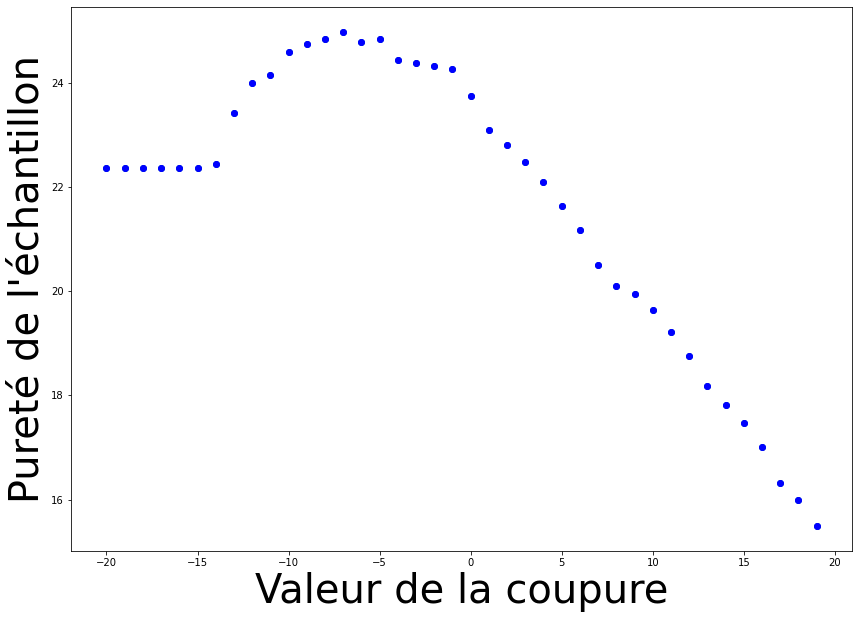

In [29]:
#Test plot différentes coupures
fig = plt.figure()
plt.plot(X1_cut, Y1_cut,marker= 'o',linestyle = 'None')
plt.xlabel('Valeur de la coupure', fontsize=40)
plt.ylabel("Pureté de l'échantillon", fontsize=40)
plt.plot(X1_cut, Y1_cut,marker= 'o',linestyle = 'None', color = 'b')
plt.show()

No handles with labels found to put in legend.


(-7.0, 40.80035816180082)

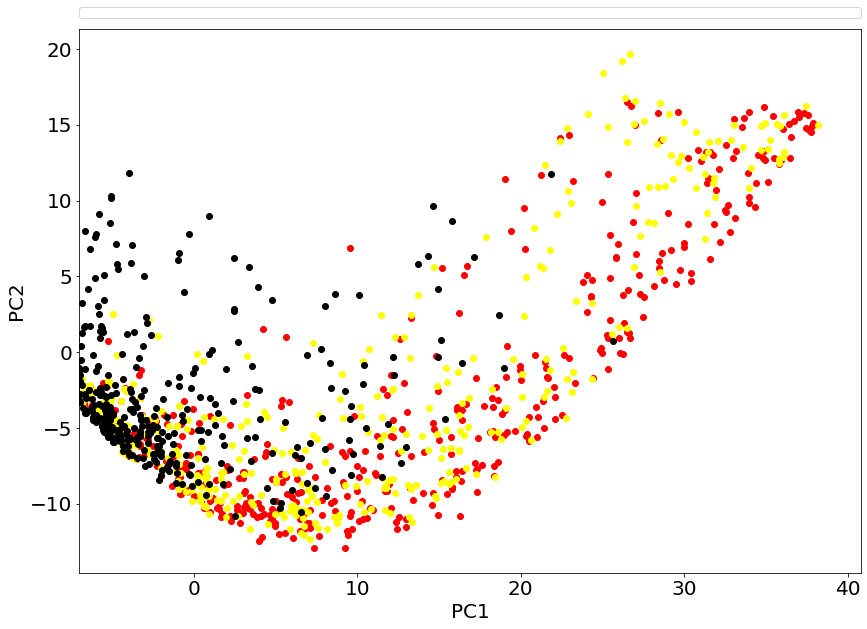

In [30]:
#Coupure
pylab.rcParams['figure.figsize'] = 14, 10
plt.plot(l_redX,l_redY,marker= 'o',linestyle = 'None', color = 'Red')  #xx5
pylab.xlabel(r'PC1', size = 20)
pylab.ylabel(r'PC2', size = 20)
pylab.xticks( size=20)
pylab.yticks(size=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5,fontsize = 14, mode="expand", borderaxespad=0.)

plt.plot(l_greenX,l_greenY,marker= 'o',linestyle = 'None', color = 'Yellow') #xx1

plt.plot(l_blueX,l_blueY,marker= 'o',linestyle = 'None', color = 'Black') #Noise
plt.xlim(left=max1_comb[index][1])


Text(0, 0.5, 'PC2')

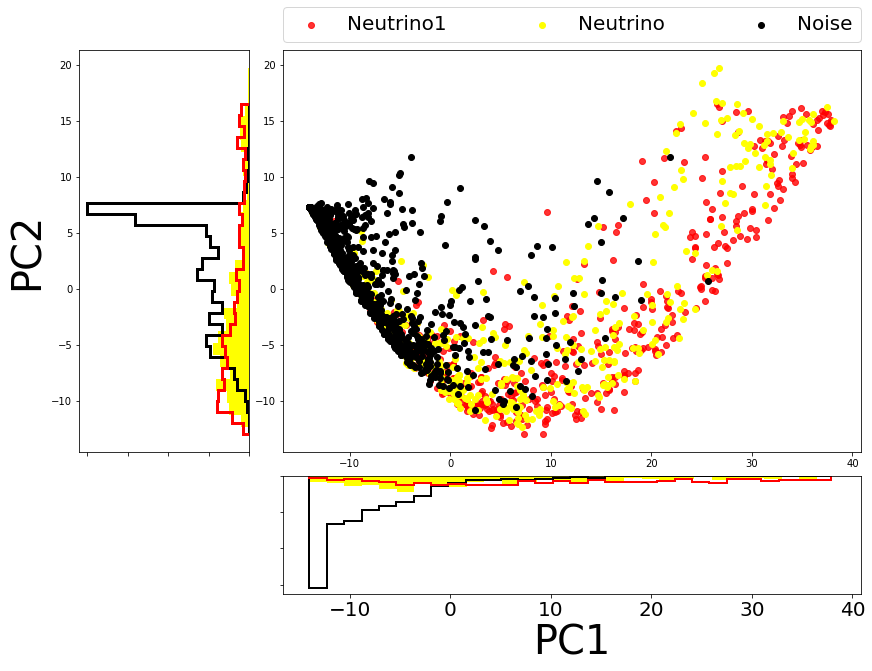

In [31]:
fig = plt.figure(figsize=(14, 10), facecolor = 'white')
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# histogram on the attached axes

x_hist.hist([l_redX,l_blueX], 30, histtype='step',fill = False, orientation='vertical', color= ["Red", "Black"],linewidth = 2)
x_hist.hist(l_greenX, 30, histtype='stepfilled', orientation='vertical', color= "Yellow")

x_hist.invert_yaxis()

pylab.xticks(size=18)
pylab.yticks(size=18)

y_hist.hist([l_redY,l_blueY], 30, histtype='step',fill = False, orientation='horizontal', color= ["Red", "Black"],linewidth = 3)
y_hist.hist(l_greenY, 30, histtype='stepfilled', orientation='horizontal', color= "Yellow")

y_hist.invert_xaxis()

# scatter points on the main axes
main_ax.scatter(l_redX, l_redY,marker= 'o', linestyle = 'None',color = 'Red', alpha = 0.8, label = 'Neutrino1')
main_ax.scatter(l_greenX, l_greenY,marker= 'o', linestyle = 'None',color = 'Yellow', label = 'Neutrino')
main_ax.scatter(l_blueX, l_blueY,marker= 'o', linestyle = 'None',color = 'Black', label = 'Noise')

pylab.xticks(size=18)
pylab.yticks(size=18)

plt.xlabel(r'PC1', size = 40)

pylab.xticks( size=20)
pylab.yticks(size=20)

main_ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4,fontsize = 20, mode="expand", borderaxespad=0.)

y_hist.set_ylabel(r'PC2', size = 40)

# t-SNE

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(nd)

In [33]:
#Initialisation du plot de différentes couleurs
li_redX = []                                          #1ère couleur : neutrino ..5 => 2*Event_nbr 1/4
li_redY = []                                          #2ème couleur : neutrino ..1 => 2*Event_nbr 1/4
li_blueX = []                                         #3ème couleur : Bruit        => 4*Event_nbr 1/2
li_blueY = []                                       
li_greenX = []                                        
li_greenY = []
#-----------------------Représentation du xx5---------------------------
for i in range(2*Event_nbr):   #2*Event_nbr     20               
    li_redX.append(X_reduced_tsne[:,0][i])
    li_redY.append(X_reduced_tsne[:,1][i])
#-----------------------Représentation du xx1---------------------------
for i in range(2*Event_nbr,4*Event_nbr):  #2*Event_nbr,4*Event_nbr      20,40 
    li_greenX.append(X_reduced_tsne[:,0][i])
    li_greenY.append(X_reduced_tsne[:,1][i])
#----------------------Représentation du bruit--------------------------
for i in range(4*Event_nbr,8*Event_nbr):  #4*Event_nbr,8*Event_nbr     40,79
    li_blueX.append(X_reduced_tsne[:,0][i])
    li_blueY.append(X_reduced_tsne[:,1][i])

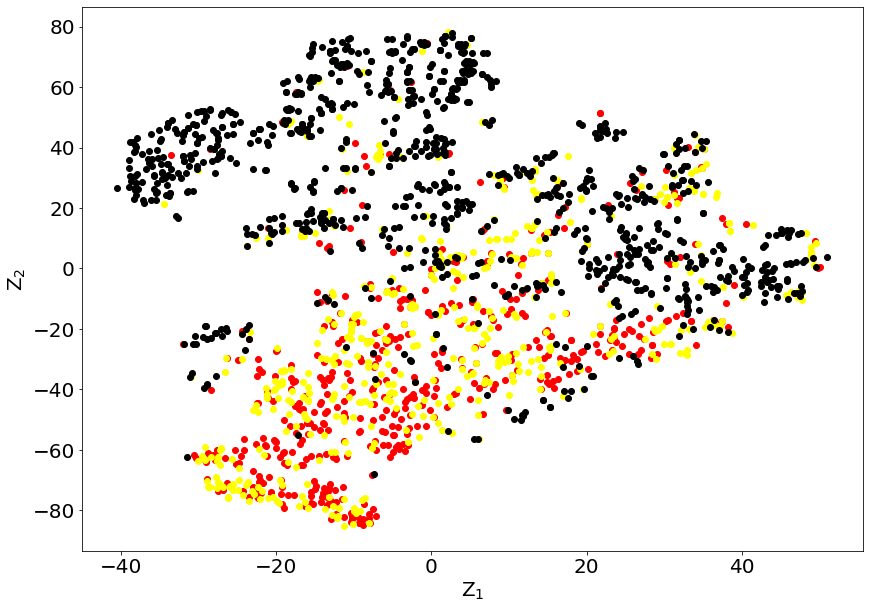

In [34]:
#Plot de différentes couleurs
plt.scatter(li_redX, li_redY, color = "Red")   #xx5
pylab.xlabel(r'Z$_1$', size = 20)
pylab.ylabel(r'Z$_2$', size = 20)
pylab.xticks(size=20)
pylab.yticks(size=20)
plt.scatter(li_greenX, li_greenY, color = "Yellow")  #xx1
plt.scatter(li_blueX, li_blueY, color = "Black")     #Noise

In [35]:
#Test de coupure/opti
X2_cut = []
max2_comb = []
for treshold in range(75,-75,-1):
    X2_cut.append(treshold)
    count= 0
    for j in li_redY:
        if j < treshold:
            count += 1
    for j in li_greenY:
        if j < treshold:
            count += 1
    count_black = 0
    for j in li_blueY:
        if j < treshold:
            count_black += 1
    max2_comb.append((count/sqrt(count+count_black),treshold))

maximum =0
index = 0
Y2_cut = []
for a in range(len(max2_comb)):
    Y2_cut.append(max2_comb[a][0])
    current = max2_comb[a][0]
    if current > maximum:
        maximum = current
        index = a
print("La coupure optimale se trouve en Z1 =",max2_comb[index][1] )

La coupure optimale se trouve en Z1 = -7


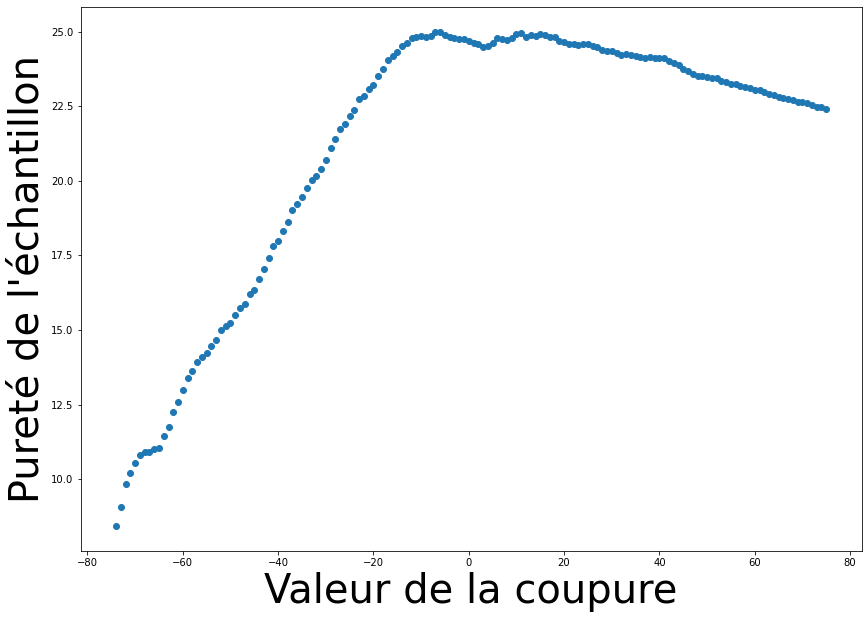

In [36]:
#Test plot différentes coupures
fig = plt.figure()
plt.plot(X2_cut, Y2_cut,marker= 'o',linestyle = 'None')
plt.xlabel('Valeur de la coupure', fontsize=40)
plt.ylabel("Pureté de l'échantillon", fontsize=40)

plt.show()

(-93.25392608642578, -7.0)

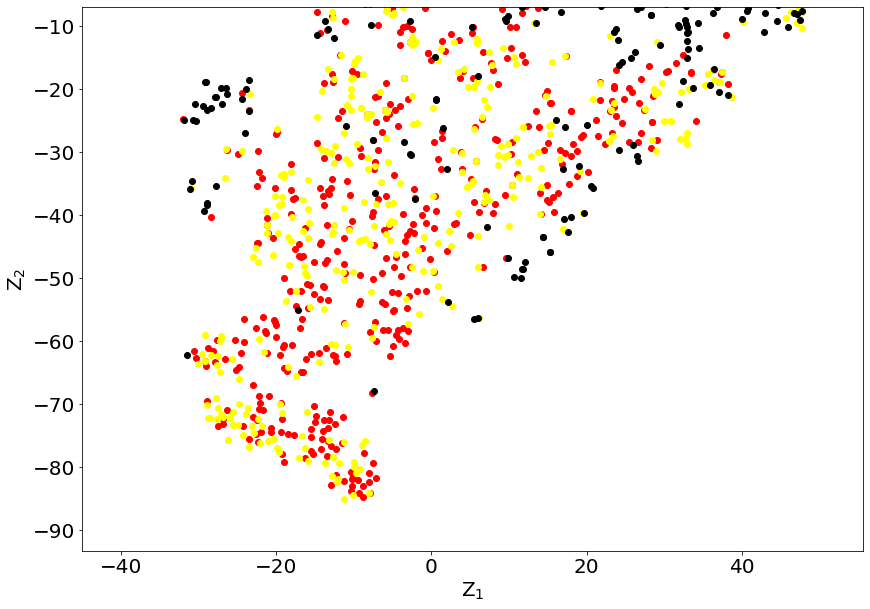

In [37]:
plt.scatter(li_redX, li_redY, color = "Red")   #xx5
pylab.xlabel(r'Z$_1$', size = 20)
pylab.ylabel(r'Z$_2$', size = 20)
pylab.xticks(size=20)
pylab.yticks(size=20)
plt.scatter(li_greenX, li_greenY, color = "Yellow")  #xx1
plt.scatter(li_blueX, li_blueY, color = "Black")     #Noise
plt.ylim(top = max2_comb[index][1] )

### t-SNE Histograms 

Text(0, 0.5, 'Z2')

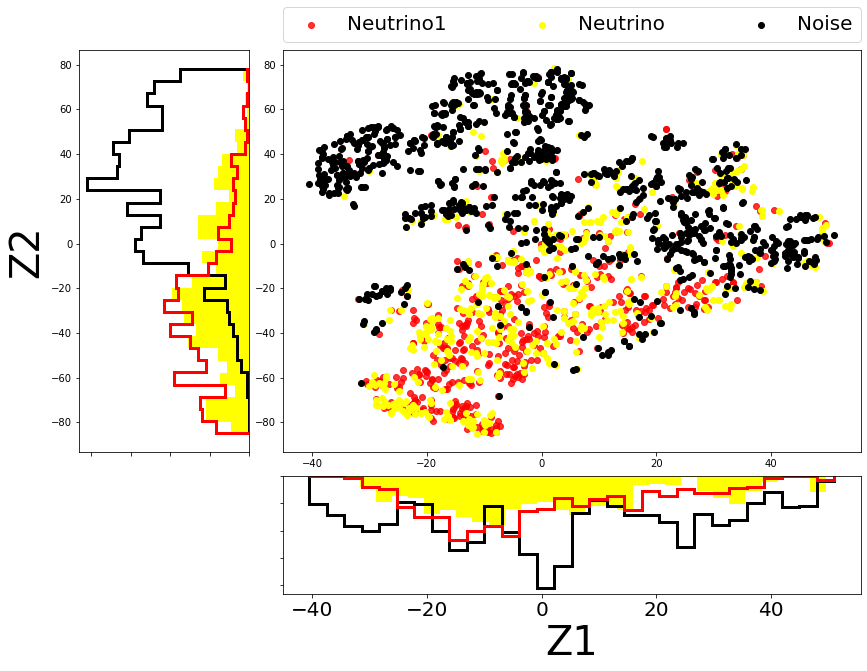

In [38]:
fig = plt.figure(figsize=(14, 10), facecolor = 'white')
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# histogram on the attached axes

x_hist.hist([li_redX,li_blueX], 30, histtype='step',fill = False, orientation='vertical', color= ["Red", "Black"],linewidth = 3)
x_hist.hist(li_greenX, 30, histtype='stepfilled', orientation='vertical', color= "Yellow")

x_hist.invert_yaxis()

pylab.xticks(size=18)
pylab.yticks(size=18)

y_hist.hist([li_redY,li_blueY], 30, histtype='step',fill = False, orientation='horizontal', color= ["Red", "Black"],linewidth = 3)
y_hist.hist(li_greenY, 30, histtype='stepfilled', orientation='horizontal', color= "Yellow")

y_hist.invert_xaxis()

# scatter points on the main axes
main_ax.scatter(li_redX, li_redY,marker= 'o', linestyle = 'None',color = 'Red', alpha = 0.8, label = 'Neutrino1')
main_ax.scatter(li_greenX, li_greenY,marker= 'o', linestyle = 'None',color = 'Yellow', label = 'Neutrino')
main_ax.scatter(li_blueX, li_blueY,marker= 'o', linestyle = 'None',color = 'Black', label = 'Noise')

pylab.xticks(size=18)
pylab.yticks(size=18)

plt.xlabel(r'Z1', size = 40)

pylab.xticks( size=20)
pylab.yticks(size=20)

main_ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4,fontsize = 20, mode="expand", borderaxespad=0.)

y_hist.set_ylabel(r'Z2', size = 40)